In [21]:
import pandas as pd
import numpy as np
import random
import pickle

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data_from_disk(file):
    with open(file, 'rb') as fid:
        data = pickle.load(fid)
    return data

In [22]:
def cooccurrence_matrix(data, entities_list):
    # Inicializa a matriz de coocorrência
    cooccurrence_matrix = np.zeros((len(entities_list), len(entities_list)), dtype=int)

    # Preenche a matriz de coocorrência
    for _, _, paragraph_entities in data:
        
        for i in range(len(entities_list)):
            if entities_list[i] in paragraph_entities:
                
                for j in range(i, len(entities_list)):
                    if entities_list[j] in paragraph_entities:
                        cooccurrence_matrix[i][j] += 1
                        if i != j:
                            cooccurrence_matrix[j][i] += 1
    return np.array(cooccurrence_matrix)

In [24]:
def edge_list(entities_list, co_matrix):
    edge_list = []

    for i in range(len(entities_list)):
        for j in range(i + 1, len(entities_list)):
            weight = co_matrix[i][j]
            if weight > 0:
                edge_list.append((entities_list[i], entities_list[j], {'weight': weight}))
    
    return edge_list

In [55]:
def plot_network_degree(G, name_list, folder, name, index):
    
    # Atribuir uma cor única a cada nó
    node_colors = range(len(name_list))

    # Identifica os 15 nós com maior grau
    degrees = dict(G.degree())
    top_degree_nodes = sorted(degrees, key=degrees.get, reverse=True)[:15]

    # Determina as arestas que conectam os nós de maior grau
    edges_of_top_degree_nodes = [(u, v) for u, v in G.edges() if u in top_degree_nodes and v in top_degree_nodes]

    # Posicionamento dos nós aleatório
    pos = nx.random_layout(G)

    plt.figure(figsize=(12, 12))

    # Desenha a rede
    nx.draw(G,
            pos=pos,
            node_color=node_colors,
            cmap=plt.get_cmap('OrRd_r'),  # mapa de cores
            node_size=35,  # Tamanho dos nós
            edge_color="#E1E5EA", # "#DBDFEA"  # Cor das arestas
            with_labels=False,  # Não mostra rótulos dos nós
            alpha= 0.7,
           ) 

    # Adiciona as arestas dos nós de maior grau em uma cor diferente
    nx.draw(G,
            pos=pos,
            node_color=node_colors,
            cmap=plt.get_cmap('OrRd_r'),  # mapa de cores
            node_size=35,  # Tamanho dos nós
            edgelist=edges_of_top_degree_nodes,
            edge_color='red',  # Cor das arestas dos nós de maior grau
            width=1.0,  # Largura das arestas
            alpha=0.2)  # Transparência das arestas


    for node in top_degree_nodes:
        x, y = pos[node]
        plt.annotate(node, (x, y), ha='center', va='center', fontsize=10,
                     # fontweight='heavy',
                     color='#461959', #B80D57 #99235C
                     backgroundcolor='white',
                     bbox=dict(boxstyle='round,pad=0.2', edgecolor='#D3CEDF', facecolor='#F9F5F6'))
    
    legend_text = f"Personagens (nós): {G.number_of_nodes()}\nOcorrência (arestas): {G.number_of_edges()}"
    plt.figtext(0.1, 0.94, legend_text, fontsize=11, color='#461959', 
                bbox=dict(facecolor='white', edgecolor='#D3CEDF', boxstyle='round,pad=0.6'))

    plt.title(name , fontsize=18, style='italic', color='#461959', va='baseline')
    plt.axis('off')
    # plt.savefig("graphs/graph_" + folder + "_" + str(index) + '.png', dpi=300, bbox_inches='tight')
    plt.show()

In [59]:
def medidas(G):
    
    K = dict(nx.degree_centrality(G)) # Centralidade de grau
    CC = dict(nx.clustering(G)) # Clustering coeficient
    CLC = dict(nx.closeness_centrality(G)) # Closeness centrality
    B = dict(nx.betweenness_centrality(G, endpoints=True)) # Betweenness centrality
    EC = dict(nx.eigenvector_centrality(G, max_iter=1000)) # Eigenvetor centrality
    PR = dict(nx.pagerank(G, alpha=0.85)) # PageRank
    
    
    df = pd.DataFrame({'K':list(K.values()),
                       'CC':list(CC.values()),
                       'CLC':list(CLC.values()),
                       'B':list(B.values()),
                       'EC':list(EC.values()),
                       'PR':list(PR.values())})
    
    # Vetor com valores médios das medidas de rede de co-ocorrência
    medidas = list(df.mean())
    
    display(df.head(15))
    
    return medidas

304
Matriz de Co-ocorrência (304, 304)


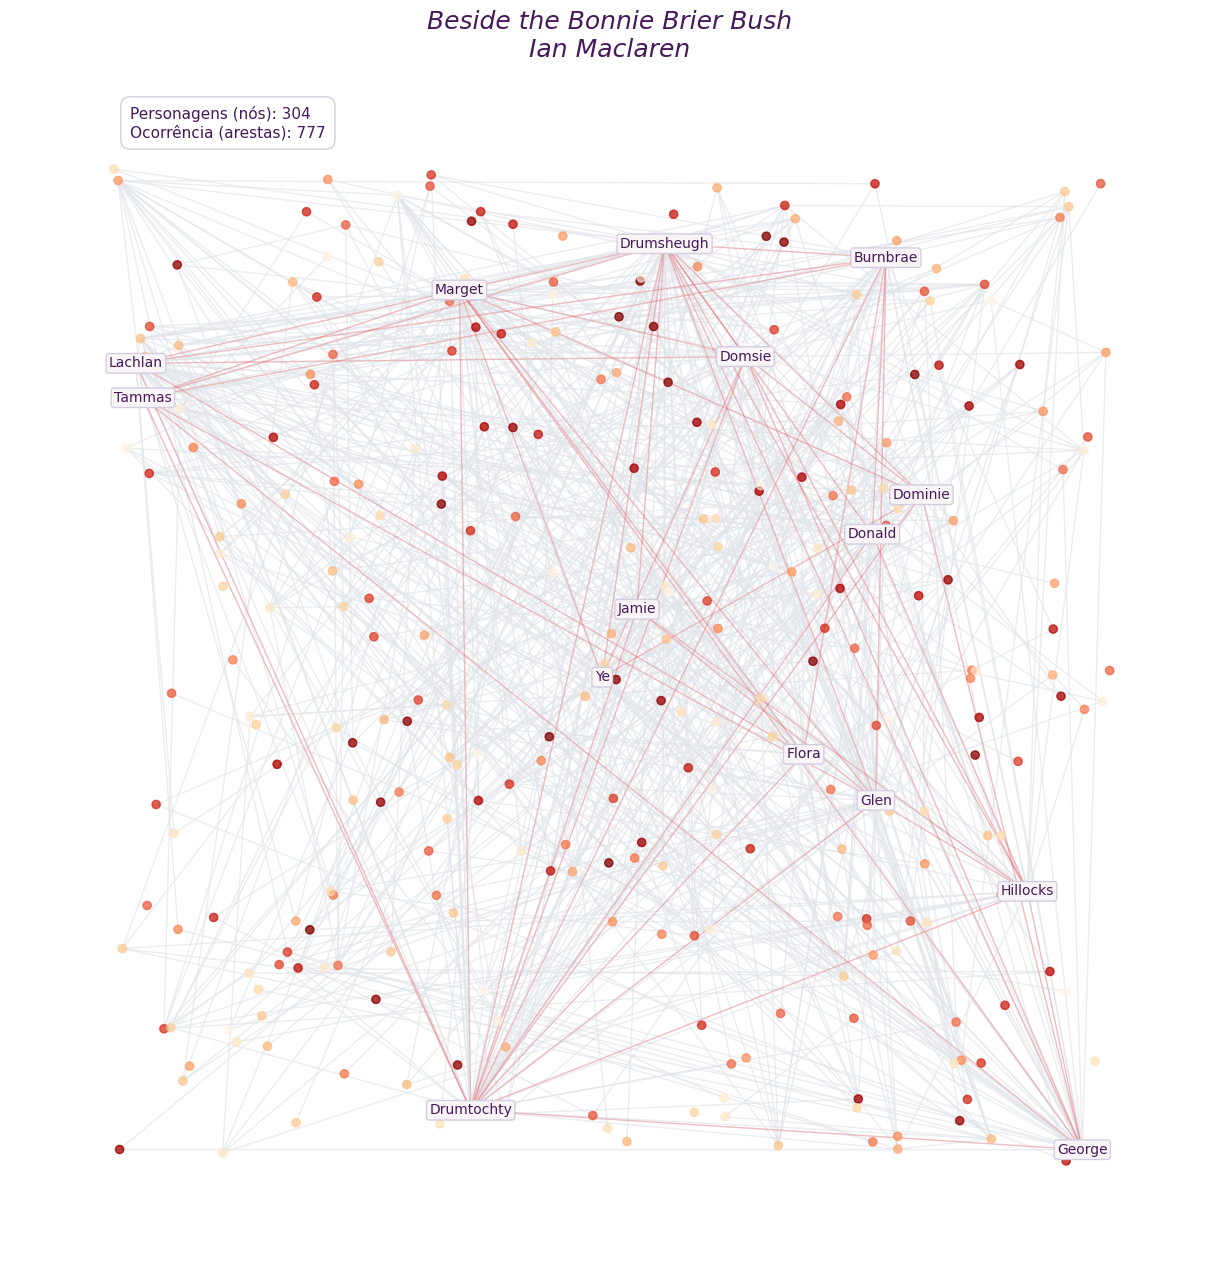

,K,CC,CLC,B,EC,PR
0,0.003300,0.000000,0.235364,0.005276,8.727955e-03,0.000915
1,0.006601,1.000000,0.254414,0.005276,1.538889e-02,0.001541
2,0.003300,0.000000,0.248573,0.005276,1.177161e-02,0.000920
3,0.026403,0.642857,0.317396,0.009182,7.898030e-02,0.003366
4,0.003300,0.000000,0.228734,0.005276,8.455239e-03,0.000917
5,0.049505,0.323810,0.320002,0.016747,1.025222e-01,0.008521
6,0.019802,1.000000,0.289141,0.005276,5.289273e-02,0.002774
7,0.016502,1.000000,0.266231,0.005276,4.160077e-02,0.002215
8,0.003300,0.000000,0.273326,0.005276,2.009948e-02,0.000900
9,0.009901,1.000000,0.260885,0.005276,3.285411e-02,0.001533


Valores médios das medidas de rede:
 [0.016870766023970817, 0.5134629202554766, 0.21447187205472734, 0.008661152212866716, 0.032733946916331996, 0.0032894736842105257]


In [64]:
df = pd.read_csv('catalog_v0.xlsx - success.csv')

folder="success"

for i in range(len(df)):
    index = df["Index"][i]
    name = df["Title"][i] + '\n' + df['Author'][i]

    data = load_data_from_disk('dados/data_' + folder + '_' + str(index)+ '.pk')
    
    entities_list = load_data_from_disk('dados/entities_' + folder + '_' + str(index)+ '.pk')
    print(len(entities_list))
    
    # Matriz de coocorrência
    co_matrix = cooccurrence_matrix(data, entities_list)
    print("Matriz de Co-ocorrência", co_matrix.shape)
    
    # Lista de arestas
    edgelist = edge_list(entities_list, co_matrix)
    
    # Rede
    G = nx.Graph()
    G.add_nodes_from(entities_list)
    G.add_edges_from(edgelist)
    
    # Visualização de rede - 15 personagens com maior grau
    plot_network_degree(G, entities_list, folder, name, index)
    
    medidas_rede = medidas(G)
    print('Valores médios das medidas de rede:\n', medidas_rede)
    
    break

In [68]:
# other - Others (1895 - 1923)
dfo = pd.read_csv('catalog_v0.xlsx - other.csv')
dfo['Classe'] = 0
print(len(dfo))

sample_list = [0.028878193261754906, 0.40067567567567564, 0.059625055724921355, 0.00557351131212664, 0.0443319050197565, 0.013513513513513514]
medidas_other = []

for _ in range(len(dfo)):
    random_list = [random.uniform(min(sample_list), max(sample_list)) for _ in sample_list]
    medidas_other.append(random_list)

dfo["Medidas"] = medidas_other
dfo.head()

109


,Title,Author,Year,Index,Classe,Medidas
0,In the Land Of Cave And Cliff Dwellers,Frederick Schwatka,1895,1,0,"[0.1547025761382259, 0.3075383827737033, 0.253..."
1,Jude the Obscure,Thomas Hardy,1895,2,0,"[0.21148351735048324, 0.2684819065504322, 0.03..."
2,The Golden Age,Kenneth Grahame,1895,3,0,"[0.1651684748784722, 0.16644348136796042, 0.03..."
3,The Lost Stradivarius,John Meade Falkner,1895,4,0,"[0.027341807529302074, 0.3617459032122707, 0.3..."
4,The British Barbarians,Grant Allen,1895,5,0,"[0.01884956925304343, 0.3073387661057521, 0.22..."


In [63]:
# success- Publishers Weekly’s Bestselling Novels
dfs = pd.read_csv('catalog_v0.xlsx - success.csv')
dfs['Classe'] = 1
print(len(dfs))

medidas_success = []

for _ in range(len(dfs)):
    random_list = [random.uniform(min(sample_list), max(sample_list)) for _ in sample_list]
    medidas_success.append(random_list)

dfs['Medidas'] = medidas_success
dfs.head()

110


,Title,Author,Year,Index,Classe,Medidas
0,Beside the Bonnie Brier Bush,Ian Maclaren,1895,1,1,"[0.19756031225785667, 0.07550870135757651, 0.3..."
1,Trilby,George Du Maurier,1895,2,1,"[0.3058725431482089, 0.01760866332268913, 0.30..."
2,The Adventures of Captain Horn,Frank Richard Stockton,1895,3,1,"[0.056148607767334886, 0.18319216489313356, 0...."
3,The Manxman,Hall Caine,1895,4,1,"[0.2205068452816499, 0.1756917163950179, 0.184..."
4,The Princess Aline,Richard Harding Davis,1895,5,1,"[0.20876170404289546, 0.12571590026580579, 0.3..."


In [ ]:
concat = pd.concat([dfs, dfo], axis=0)
concat = concat.sample(frac=1).reset_index(drop=True)
display(concat)

In [ ]:
for i in range(len(concat)):
    name = ''.join(concat["Title"][i].split())
    index = concat["Index"][i]
    namesearch = str(index) + '_' + str(name)
    print(namesearch)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# dados
X = np.array(concat['Medidas'])
y = list(concat['Classe']) # classes de sucesso
print("classes de sucesso:", y)

# Separar em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo (usando KNN neste exemplo)
knn = KNeighborsClassifier(n_neighbors=5)  # K=5 para o exemplo, ajuste conforme necessário
knn.fit(X_train, y_train)

# Previsão das classes para o conjunto de teste
y_pred = knn.predict(X_test)